In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

from sklearn.datasets import load_iris




In [2]:
iris=load_iris()
X=iris.data
y=iris.target

df=pd.DataFrame(X,columns=iris.feature_names)
df['target']=y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


(120, 4)
(120, 2)


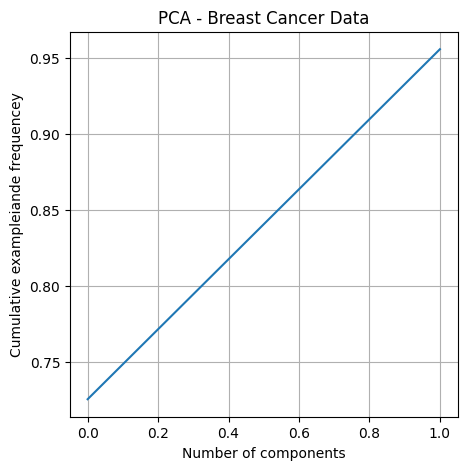

In [6]:
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)
print(X_train.shape)
print(X_train_pca.shape)

plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative exampleiande frequencey")
plt.title("PCA - Breast Cancer Data")
plt.grid()
plt.show()



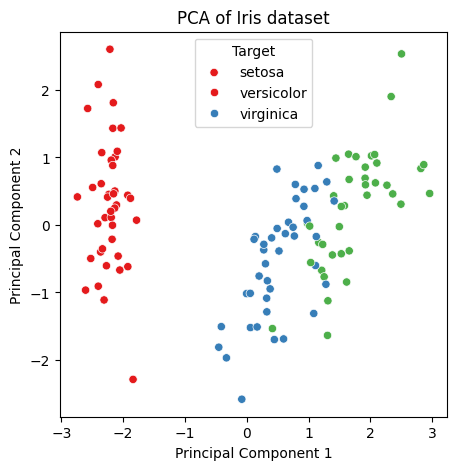

In [13]:
#
import seaborn as sns 
df_pca = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y_train

# PCA scatter plot
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Target', palette='Set1')
plt.title('PCA of Iris dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', labels=iris.target_names)
plt.show()

In [8]:
df_pca

,PC1,PC2,Target
0,-2.741058,0.415798,0
1,-2.214577,2.604762,0
2,0.926828,0.529167,1
3,-2.293429,0.108078,0
4,-2.524548,-0.496938,0
...,...,...,...
115,0.521362,-0.385743,1
116,0.415127,-1.535405,2
117,-2.159999,1.811532,0
118,0.377947,-0.947346,1
